# Taylor Swift's Spotify Stats

#### Taylor Swift has been a huge part of my life, right from when I first discovered her music in 2008. I fell in love with her songs and her stories; so much so I learned to play the guitar just watching her live acoustic performances. As a data analyst, guitarist, and Swiftie, I wanted to analyze her Spotify discography (as of 2021), and uncover insights on how her music truly never goes out of Style.

##### Data source: https://www.kaggle.com/datasets/thespacefreak/taylor-swift-spotify-data

In [90]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [91]:
#import the data
data = pd.read_csv("spotify_taylorswift.csv")

In [92]:
#quickly view the data frame 
data.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [93]:
#check what variables (columns) are captured
data.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo'],
      dtype='object')

In [94]:
#remove obsolete columns
data.drop(columns = 'Unnamed: 0', inplace = True)
data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [95]:
#check for nulls in each column
data.isnull().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
dtype: int64

In [96]:
#check statistical distribution of each column
data.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,236663.520468,61.228070,0.588632,0.321634,0.585977,0.002490,0.145927,-7.322111,0.065583,0.422984,124.141415
std,40456.720158,11.904548,0.115067,0.334019,0.189577,0.018766,0.090314,2.878787,0.105956,0.192617,31.484487
min,107133.000000,0.000000,0.292000,0.000191,0.118000,0.000000,0.033500,-17.932000,0.023100,0.049900,68.534000
25%,211833.000000,58.000000,0.527000,0.030450,0.462000,0.000000,0.092950,-8.861500,0.029500,0.277500,96.052000
50%,234000.000000,63.000000,0.593000,0.156000,0.606000,0.000002,0.115000,-6.698000,0.037200,0.416000,121.956000
75%,254447.000000,67.000000,0.655500,0.674000,0.732000,0.000064,0.168000,-5.336500,0.055100,0.545000,146.040500
max,403887.000000,82.000000,0.897000,0.971000,0.944000,0.179000,0.657000,-2.098000,0.912000,0.942000,207.476000


In [97]:
#check what data type each column is (in case we need to change a datatype for further analysis in Python)
data.dtypes

name                 object
album                object
artist               object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

In [98]:
#convert the data type of 'release date' from object (string) to datetime
data['release_date'] = pd.to_datetime(data['release_date'])

In [99]:
#convert 'length (in ms)' to timedelta and change the format to hh:mm:ss
data['length'] = pd.to_timedelta(data['length'], unit = 'ms').dt.seconds.apply(lambda x: pd.Timedelta(seconds = x))
data['length'] = pd.Series([str(x)[7:] for x in data['length']])

In [100]:
#check if all changes have been made as expected
data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,00:03:52,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,00:02:53,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,00:03:23,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,00:03:19,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,00:03:59,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [101]:
# find the top 20 most popular songs (can't believe 'ME!' is 6th, Swifties have weird taste)
pop_songs = data.sort_values('popularity', ascending = False).head(20)
pop_songs.reset_index(inplace = True)
pop_songs

,index,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,00:03:51,82,0.760,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997
1,64,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,00:03:39,80,0.647,0.06470,0.800,0.000000,0.3340,-5.384,0.1650,0.9420,160.078
2,95,Lover,Lover,Taylor Swift,2019-08-23,00:03:41,80,0.359,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534
3,82,Delicate,reputation,Taylor Swift,2017-11-10,00:03:52,78,0.750,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045
4,106,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,00:02:51,78,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,0.7140,85.026
5,94,Cruel Summer,Lover,Taylor Swift,2019-08-23,00:02:58,77,0.552,0.11700,0.702,0.000021,0.1050,-5.707,0.1570,0.5640,169.994
6,108,ME! (feat. Brendon Urie of Panic! At The Disco),Lover,Taylor Swift,2019-08-23,00:03:13,77,0.610,0.03300,0.830,0.000000,0.1180,-4.105,0.0571,0.7280,182.162
7,83,Look What You Made Me Do,reputation,Taylor Swift,2017-11-10,00:03:31,77,0.766,0.20400,0.709,0.000014,0.1260,-6.471,0.1230,0.5060,128.070
8,86,Getaway Car,reputation,Taylor Swift,2017-11-10,00:03:53,76,0.562,0.00465,0.689,0.000002,0.0888,-6.745,0.1270,0.3510,172.054
9,150,You Belong With Me (Taylor’s Version),Fearless (Taylor's Version),Taylor Swift,2021-04-09,00:03:51,76,0.632,0.06230,0.773,0.000000,0.0885,-4.856,0.0346,0.4740,130.033


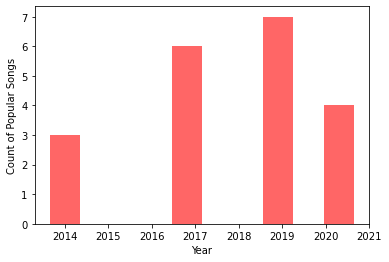

In [102]:
#What year had the most successful releases?
plt.hist(pd.DatetimeIndex(pop_songs['release_date']).year, align = 'left', color = 'red', alpha = 0.6)
plt.xlabel('Year')
plt.ylabel('Count of Popular Songs')
plt.show()

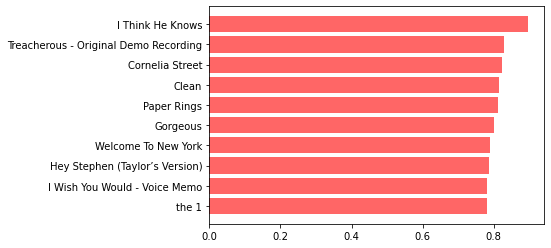

In [122]:
#Top 10 most danceable songs (Treacherous demo recording - really??)
dance_songs = data.sort_values('danceability', ascending = False).head(10)
plt.barh(dance_songs['name'].unique(), dance_songs['danceability'], color = 'red', alpha = 0.6)
plt.gca().invert_yaxis()
plt.show()

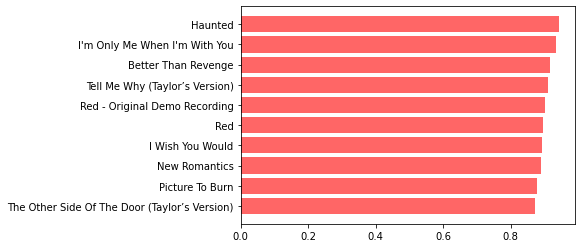

In [124]:
#Top 10 songs with the highest energy
energetic_songs = data.sort_values('energy', ascending = False).head(10)
plt.barh(energetic_songs['name'].unique(), energetic_songs['energy'], color = 'red', alpha = 0.6)
plt.gca().invert_yaxis()
plt.show()

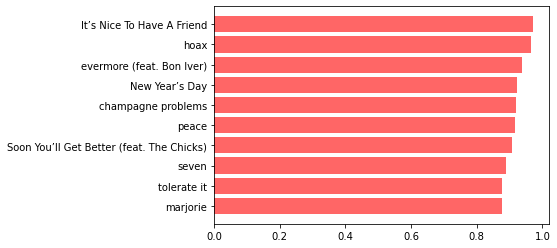

In [123]:
#Top 10 most acoustic songs
acoustic = data.sort_values('acousticness', ascending = False).head(10)
plt.barh(acoustic['name'].unique(), acoustic['acousticness'], color = 'red', alpha = 0.6)
plt.gca().invert_yaxis()
plt.show()

In [103]:
#what's her longest song?
long_song = data.sort_values('length', ascending = False).head(1)
long_song

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
19,Dear John,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,00:06:43,48,0.583,0.183,0.468,0.000002,0.111,-5.378,0.0278,0.126,119.375


In [104]:
#what's her shortest song (not counting voice memos)?
data_no_memos = data[data['name'].str.contains("Memo") == False]
short_song = data_no_memos.sort_values('length', ascending = True).head(1)
short_song

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
109,It’s Nice To Have A Friend,Lover,Taylor Swift,2019-08-23,00:02:30,65,0.737,0.971,0.175,0.000337,0.171,-9.912,0.0401,0.545,70.008


In [105]:
#check what albums exist
data.album.unique()

array(['Taylor Swift', 'Speak Now (Deluxe Package)',
       'Red (Deluxe Edition)', '1989 (Deluxe)', 'reputation', 'Lover',
       'folklore (deluxe version)', 'evermore (deluxe version)',
       "Fearless (Taylor's Version)"], dtype=object)

In [106]:
#avg metrics (spotify defined metrics) for each album
album_wise = data.groupby('album').mean()
album_wise.sort_values('popularity', ascending = False)

,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
album,,,,,,,,,,
Lover,72.111111,0.658222,0.333743,0.545222,7.330572e-04,0.115233,-8.013278,0.099117,0.481444,119.972722
reputation,71.866667,0.657933,0.138515,0.582867,4.378800e-05,0.152153,-7.672400,0.095120,0.293400,127.540133
Fearless (Taylor's Version),65.576923,0.551038,0.214061,0.639115,6.142308e-07,0.162354,-6.196538,0.037854,0.421923,131.237231
evermore (deluxe version),65.470588,0.526824,0.794118,0.494059,2.061718e-02,0.113588,-9.781588,0.057906,0.433529,120.707294
folklore (deluxe version),62.647059,0.541941,0.717588,0.415824,3.017124e-04,0.110465,-10.336059,0.039482,0.361353,119.884412
Red (Deluxe Edition),60.500000,0.633409,0.148799,0.600773,1.802364e-03,0.119082,-7.380045,0.036582,0.468145,110.296545
1989 (Deluxe),54.421053,0.633211,0.244620,0.624842,7.042684e-04,0.203211,-7.924105,0.173453,0.454211,127.033053
Taylor Swift,50.133333,0.545267,0.182995,0.664267,5.380000e-05,0.160773,-4.731667,0.032687,0.426533,126.053800
Speak Now (Deluxe Package),49.727273,0.559000,0.226521,0.659409,1.143727e-04,0.167023,-4.806909,0.035150,0.429682,132.835682


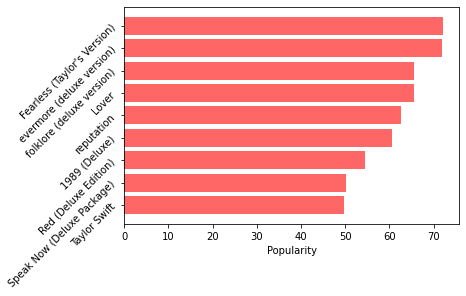

In [107]:
#visualise the popularity of each album (personally Speak Now is one of my favs and yes I'm upset)
plt.barh(data['album'].unique(), sorted(data.groupby('album')['popularity'].mean()), color = 'red', alpha = 0.6)
plt.yticks(rotation = 45)
plt.xlabel('Popularity')
plt.show()